Подключение стандартных библиотек для работы

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

import warnings
warnings.filterwarnings("ignore")  

# Прогнозирование сердечной недостаточности

Подключим датасет

In [2]:
dataset_link = "C:\\Projects\\Neimark\\hw1_Heart\\heart.csv"
dataset = pd.read_csv(dataset_link)

In [3]:
dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
dataset.shape

(918, 12)

In [5]:
dataset.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [6]:
dataset.tail(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Датасет размера 918 строк на 12 столбцов (признаков)<br><br>

Признаки:<br>

`Age` - возраст (integer)<br>
`Sex` - пол (Male, Female)<br>
`ChestPainType` - тип боли в груди (ASY, NAP, others)<br>
`RestingBP` - давление крови в состоянии покоя (integer)<br>
`Cholesterol` - уровень холестерина (integer)<br>
`FastingBS` - уровень сахара в крови (0 - норма, 1 - выше нормы)<br>
`RestingECG` - рез-ты кардиограммы (Normal, LVH - гипертрофия левого желудочка, other)<br>
`MaxHR` - достигнутая максимальная частота сердечных сокращений (пульс) (integer)<br>
`ExerciseAngina` - стенокардия, вызванная физической нагрузкой (Y (yes), N (no))<br>
`Oldpeak` - значение ST-test<br>
`ST_Slope` - ST-test показывающий ST сегмент (Up - восходящий, Down - нисходящий, Flat - квартира)<br>
`HeartDisease` - результат (1 - есть болезнь, 0 - нет болезни)<br><br>


Получается:<br>

`Age`, `RestingBP`, `Cholesterol`, `MaxHR`, `Oldpeak` количественные (числовой) признаки<br>
`Sex`, `ChestPainType`, `RestingECG`, `ExerciseAngina`, `ST_Slope` - категориальные(номиальный) признаки<br>
`HeartDisease` - результат для каждого пациента в формате (1 - есть болезнь, 0 - нет болезни)<br>

Заметим, никакие признаки между собой не коррелируют!

# Пропущенные значения

In [8]:
dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

В датасете нет ни одного пропущенного значения

# Обработка категориальных переменных

Для всех категориальных признаков заменим тип на 'category' и выведем в качетсве проверки несколько из них
(это необходимо для корректной работы с ними)

In [9]:
dataset['Sex'] = dataset['Sex'].astype('category')
dataset['Sex'].dtype

CategoricalDtype(categories=['F', 'M'], ordered=False)

In [10]:
dataset['ChestPainType'] = dataset['ChestPainType'].astype('category')
dataset['ChestPainType'].dtype

CategoricalDtype(categories=['ASY', 'ATA', 'NAP', 'TA'], ordered=False)

In [11]:
dataset['RestingECG'] = dataset['RestingECG'].astype('category')
dataset['ExerciseAngina'] = dataset['ExerciseAngina'].astype('category')
dataset['ST_Slope'] = dataset['ST_Slope'].astype('category')

Получим информацию про числовые и категориальные признаки

In [12]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [13]:
dataset.describe(include=['category'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


`count` - количество всех эелементов <br>
`unique` - кол-во различных элементов<br>
`top` - преобладающий элемент<br>
`freq` - количество встреч преобладающего элемента<br>

In [14]:
dataset.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

# Визуализация данных

Исходя из статистики, возраст - один из гланых факторов для развития сердечно-сосудистых заболеваний (с каждым десятилетеем после 55 лет риск развития болезни удваивается), также по оценкам эспертов 82% людей, которые умирают от ишемической болезни старше 65 лет.
Тогда построим график зависимости возраста и наличия болезни.

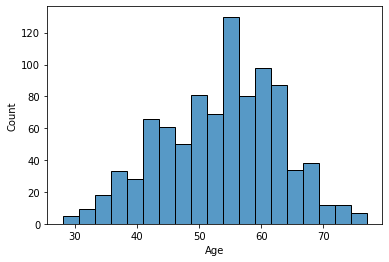

In [15]:
sns.histplot(dataset['Age'])
pass

Заметим, что пик людей приходится возраст 55 - 62,5 лет, а люди моложе 40 и старше 70 - слабо представлены в данных

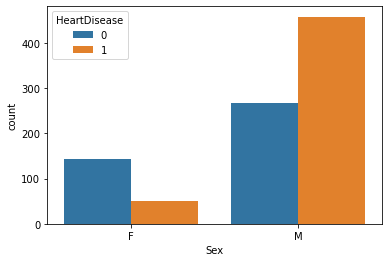

In [16]:
sns.countplot(x='Sex', hue='HeartDisease', data=dataset)
pass

In [17]:
dataset.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

В обучающей выборке преобладает количество мужчин 725 на 193 женщины. Это значит, что в будущем стоит учитывать, что вполне нормально, что мужчин с подтвержденным диагнозом будет в разы больше. Также стоит заметить, что у мужчин чаще выявляют болезни, чем не выявляют.

Теперь построим график зависимости диагностирования заболевания от определенного типа боли в груди

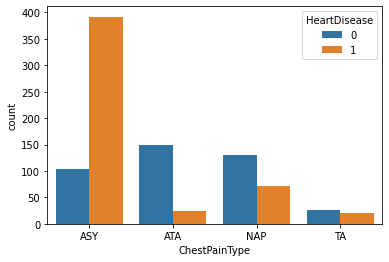

In [18]:
sns.countplot(data=dataset, x='ChestPainType', hue='HeartDisease')
pass

На диаграмме видно, что у признака `ChestPainType` сильно преобладает класс `ASY`, также относительно других выделяется класс 'NAP'.

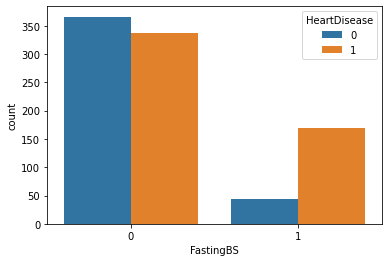

In [19]:
sns.countplot(data=dataset, x='FastingBS', hue='HeartDisease')
pass

Показатель `FastingBS` отвечает за уровень сахара в крови: 0 - норма, 1 - выше нормы. Этот показатель очень важен, так как, если уровень сахара превышен, это свидетельствует о некорректной выроботке инсулина или реакции на него, что сильно повышает вероятность возникновения болезни. Заметим, что у пациентов с повышенным данным показателем болезни диагностируют чаще.

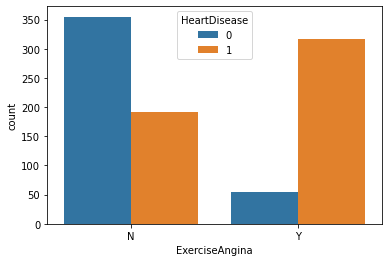

In [20]:
sns.countplot(data=dataset, x='ExerciseAngina', hue='HeartDisease')
pass

`ExerciseAngina` - стенокардия, вызванная физической нагрузкой. Также заметим, у людей с положительным результатом в этом тесте чаще выявляют болезни сердца.

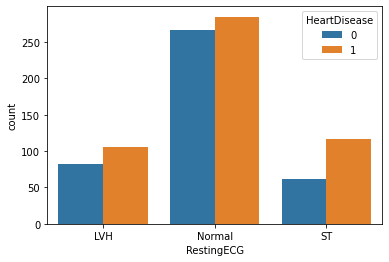

In [21]:
sns.countplot(data=dataset, x='RestingECG', hue='HeartDisease')
pass

# Выбросы

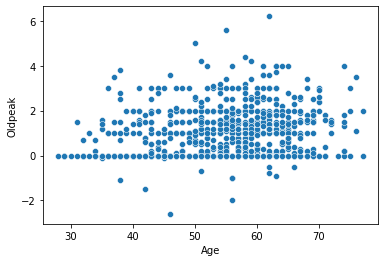

In [22]:
sns.scatterplot(data=dataset, x="Age", y="Oldpeak")
pass

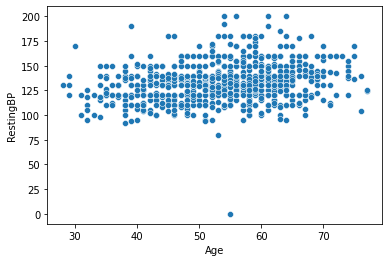

In [23]:
sns.scatterplot(data=dataset, x="Age", y="RestingBP")
pass

На двух последних диаграммах отлично видно, что в выборке присутствуют выбросы.

# Разбиение на train и test выборки

In [24]:
from sklearn.model_selection import train_test_split

X = dataset.drop('HeartDisease', axis=1)
y = dataset['HeartDisease']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=50)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


print('X_train ', X_train.shape)
print('X_test ', X_test.shape)

X_train  (642, 15)
X_test  (276, 15)


In [25]:
y_train.value_counts()

1    357
0    285
Name: HeartDisease, dtype: int64

Количество выявленных и невыявленных болезней сопоставимо, значит нет несбалансированных классов (в дальнейшем можно использовать метрику accuracy).

# Обучение моделей

Рассмотрим 3 различные модели: логистическая регрессия, решающее дерево и случайный лес. <br>
В качестве метрик классификации будем рассматривать

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

In [27]:
def print_results(name_model, y_test, y_pred_test):
    print(name_model)# Решающее дерево 
    print(f'Precision_score = {precision_score(y_test, y_pred_test)}')
    print(f'Accuracy_score = {accuracy_score(y_test, y_pred_test)}')
    print(f'Recall_score = {recall_score(y_test, y_pred_test)}')
    print(f'f1_score = {f1_score(y_test, y_pred_test)}')

# Логистическая регрессия

In [28]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

print_results('LOGISTIC REGRESSION', y_test, y_pred_test)

LOGISTIC REGRESSION
Precision_score = 0.8518518518518519
Accuracy_score = 0.8659420289855072
Recall_score = 0.9139072847682119
f1_score = 0.8817891373801917


# SVM

In [29]:
svm = LogisticRegression()
svm.fit(X_train, y_train)
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

print_results('SVM', y_test, y_pred_test)

SVM
Precision_score = 0.8518518518518519
Accuracy_score = 0.8659420289855072
Recall_score = 0.9139072847682119
f1_score = 0.8817891373801917


# Решающее дерево

In [30]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

print_results('DESISSION TREE', y_test, y_pred_test)

DESISSION TREE
Precision_score = 0.7945205479452054
Accuracy_score = 0.7644927536231884
Recall_score = 0.7682119205298014
f1_score = 0.7811447811447811


# Случайный лес

In [31]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_train = forest.predict(X_train)
y_pred_test = forest.predict(X_test)

print_results('RANDOM FOREST', y_test, y_pred_test)

RANDOM FOREST
Precision_score = 0.8726114649681529
Accuracy_score = 0.8768115942028986
Recall_score = 0.9072847682119205
f1_score = 0.8896103896103896


В задаче диагностики болезни следует опираться на метрику Recall, так как лучше меньше пропускать больных. На этой метрике лучше всего себя показали логистическая регрессия и SVM, поэтому стоит отдать предпочтенье им.

# Выводы:

Данных было не очень много, поэтому картину на 100 процентов целиком увидеть не получилось, однако какие-то выводы можно сделать. 
Также в этой задача стоит учитывать влияние каждого признака на таргет переменную, так как задача медицинская, и не всегда цифры способны передать реальную картину. 
Исходя из тех же размышлений было принято решение анализировать по метрике Recall, которая дает наиболее оптимальный вариант конкретно для данной задачи.
В целом, мне кажется, получилось неплохо. Лично для меня это был интересный и полезный опыт.